In [1]:
# Importing main necessary libraries for the project
import numpy as np
import pandas as pd
from IPython.display import display # to use display() for DataFrames

# Reading the anonymous data
data = pd.read_csv("train.csv")
# Dropping ID_code since it's redundant given the dataframe index
data.drop("ID_code", axis=1, inplace=True)

# Display first 10 observations
display(data.head(n=10))

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [2]:
# Number of customers
n_cust = data.shape[0]

# Number of customers that will not make future transactions
n_no_fut_trans = data[data["target"] == 0].shape[0]

# Number of customers that will make future transactions
n_fut_trans = data[data["target"] == 1].shape[0]

print("Total number of customers: {}".format(n_cust))
print("Customers that will not make future transactions: {}".format(n_no_fut_trans))
print("Customers that will make future transactions: {}".format(n_fut_trans))
print("Percentage of customers tha will make future transactions: {}%".format(n_fut_trans/n_cust*100))

Total number of customers: 200000
Customers that will not make future transactions: 179902
Customers that will make future transactions: 20098
Percentage of customers tha will make future transactions: 10.049%


In [3]:
# Outlier detection (Turkey's method)
outliers_t  = []
repeated = []

# Features
X = data.drop(['target'], axis = 1)

# For each feature 
for feature in X.keys():
    
    # Calculate first quartile
    Q1 = np.percentile(X[feature], 25)
    
    # Calculate
    Q3 = np.percentile(X[feature], 75)
    
    # Calculate interquatile range * 1.5
    step = (Q3-Q1)*1.5
    
    for i in list((X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))]).index.values):
        if i not in outliers_t:
            outliers_t.append(i)
        elif i not in repeated:
            repeated.append(i)


print("Number of points considered outliers in more than one feature: {}".format(len(repeated)))
print("Number of points considered outliers in some feature: {}".format(len(outliers_t)))

Number of points considered outliers in more than one feature: 1556
Number of points considered outliers in some feature: 24896


In [4]:
from sklearn.model_selection import train_test_split

# Dropping rows with outlier values in more than one feature
filtered_features = data.drop(repeated)
filtered_target = data[['target']].drop(repeated)

# Checking data distribution after outliers removal
# Number of customers that will not make future transactions
n_no_fut_trans = filtered_target[filtered_target["target"] == 0].shape[0]
# Number of customers that will make future transactions
n_fut_trans = filtered_target[filtered_target["target"] == 1].shape[0]

print("Customers that will not make future transactions: {}".format(n_no_fut_trans))
print("Customers that will make future transactions: {}".format(n_fut_trans))
print("Percentage of customers tha will make future transactions: {}%".format(n_fut_trans/n_cust*100))

# Dividing train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.3, random_state=42)

# Checking train and test sets size
print("X_train size: {} \t y_train size: {}".format(X_train.shape[0], y_train.shape[0]))
print("X_test size: {} \t y_test size: {}".format(X_test.shape[0], y_test.shape[0]))

Customers that will not make future transactions: 178569
Customers that will make future transactions: 19875
Percentage of customers tha will make future transactions: 9.9375%
X_train size: 138910 	 y_train size: 138910
X_test size: 59534 	 y_test size: 59534


In [5]:
# Outlier detection (Local Outlier Factor)
# Not viable due to O(n²) complexity, takes too long as result of dataset size

# from sklearn.neighbors import LocalOutlierFactor

# lof = LocalOutlierFactor()

# outliers_l = lof.fit_predict(X)

# print("Number of points considered outliers: {}".format(len(outliers_l[outliers_l == -1])))

In [6]:
from sklearn.decomposition import PCA

# Applying pca to the filtered data
pca = PCA(n_components=0.9, svd_solver='full').fit(filtered_features.reset_index(drop=True))

# Checking number of components
print("Number of components after pca: {}".format(pca.n_components_))

# Transforming data based on components
transf_X_train = pca.transform(X_train)
transf_X_test = pca.transform(X_test)


Number of components after pca: 90


In [7]:
from sklearn.metrics import roc_auc_score, fbeta_score
from time import time

# Function used for the classifiers pipeline
def train_predict(classifier, X_train, y_train, X_test, y_test, sample_size=-1):
   
    results = {}
    
    if(sample_size == -1):
        sample_size = X_train.shape[0]
        
    start = time() # Get training start time
    classifier = classifier.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get training end time
    
    # Storing training time
    results['train_time'] = end-start
    
    start = time() # Get predictions start time
    predictions_test = classifier.predict(X_test)
    predictions_train = classifier.predict(X_train)
    end = time() # Get predictions end time
    
    results['pred_time'] = end-start
    
    # Compute area under the receive operating characterist curve using roc_auc_acore
    results['roc_train'] = roc_auc_score(y_train, predictions_train)
    results['roc_test'] = roc_auc_score(y_test, predictions_test)
    
    # Compute F-score using fbeta_score
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=2)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
    
    return results


In [8]:
# Code provided by udacity from machine learning engineer nanodegree project 
import matplotlib.pyplot as pl
def evaluate(results, roc_auc, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'roc_train', 'f_train', 'pred_time', 'roc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("ROC AUC Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("ROC AUC Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("ROC AUC on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("ROC AUC Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = roc_auc, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = roc_auc, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        pl.bar(0, 0, color=colors[i], label=learner)
    pl.legend()
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

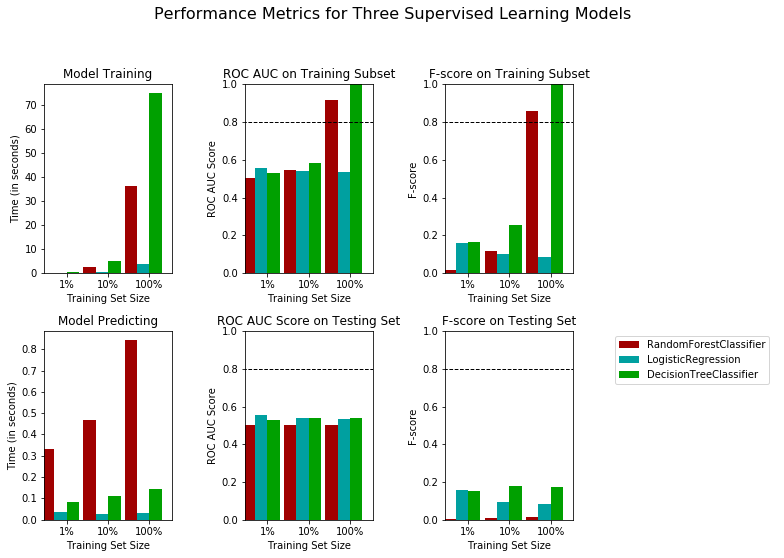

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clf_A = RandomForestClassifier(random_state=42)
clf_B = LogisticRegression()
clf_C = DecisionTreeClassifier(random_state=42)

size_1 = int(0.01 * X_train.shape[0])
size_10 =int(0.1 * X_train.shape[0])
size_100 = X_train.shape[0]

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([size_1, size_10, size_100]):
        results[clf_name][i] = train_predict(clf, transf_X_train, y_train.values.ravel(), transf_X_test, y_test, samples)
    

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, 0.8, 0.8)

In [15]:
# Checking numeric values for each method used (complete training set)
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    print("{} \n Time - Training: {} \t Testing: {} \n Accuracy - Train: {} \t Test: {} \n F-Score: Train: {} \t Test: {}" \
          .format(clf_name, \
          results[clf_name][2]['train_time'],results[clf_name][2]['pred_time'], \
          results[clf_name][2]['roc_train'],results[clf_name][2]['roc_test'], \
          results[clf_name][2]['f_train'], results[clf_name][2]['f_test']))

RandomForestClassifier 
 Time - Training: 36.223294496536255 	 Testing: 0.843144416809082 
 Accuracy - Train: 0.9159337937276295 	 Test: 0.5045281668817942 
 F-Score: Train: 0.8607957512195848 	 Test: 0.013042398145081152
LogisticRegression 
 Time - Training: 3.6984965801239014 	 Testing: 0.03390812873840332 
 Accuracy - Train: 0.5340608704088905 	 Test: 0.5323422675901842 
 F-Score: Train: 0.08832188420019627 	 Test: 0.08429584599797366
DecisionTreeClassifier 
 Time - Training: 74.9026849269867 	 Testing: 0.14626073837280273 
 Accuracy - Train: 1.0 	 Test: 0.5396320508056546 
 F-Score: Train: 1.0 	 Test: 0.17545595461891098


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth': [10, 20, 30], 'min_samples_leaf': [10, 50, 100], 'min_samples_split': [25, 100, 250]}

scorer = make_scorer(roc_auc_score)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

grid_fit = grid_obj.fit(transf_X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(transf_X_train, y_train)).predict(transf_X_test)
best_predictions = best_clf.predict(transf_X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("ROC AUC score on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

In [17]:
print(best_clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
